# Sales Data Exploratory Analysis

This project explores sales data from a retail superstore to identify trends, category performance, and top-selling products using Python, Pandas, Matplotlib, and basic statistics.


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("default")


In [34]:
file_path = "../data/superstore.csv.xlsx"
df = pd.read_excel(file_path)

df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [35]:
df.shape


(9800, 18)

In [36]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [37]:
df.isna().sum().sort_values(ascending=False).head(15)


Postal Code      11
Row ID            0
Order ID          0
Order Date        0
Ship Mode         0
Ship Date         0
Customer Name     0
Segment           0
Country           0
Customer ID       0
City              0
State             0
Region            0
Product ID        0
Category          0
dtype: int64

## Missing Values Assessment

The dataset contains a very small number of missing values.
Only the `Postal Code` column has missing entries (11 out of 9,800 rows).
Since postal codes are not required for sales or trend analysis, these missing values do not materially impact the analysis and are left as-is.


In [38]:
# Convert date columns to datetime
df["Order Date"] = pd.to_datetime(df["Order Date"], errors = "coerce")
df["Ship Date"] = pd.to_datetime(df["Ship Date"], errors = "coerce")


In [39]:
# to verify if the dates converted datetime formate 
df[["Order Date", "Ship Date"]].dtypes

#You will later mention this in your notebook like a real analyst:

#“Date columns were converted to datetime format. Any unparseable values were safely coerced to missing values.”

Order Date    datetime64[ns]
Ship Date     datetime64[ns]
dtype: object

In [40]:
# Create time-based features( new columns)
df["Order Year"] = df["Order Date"].dt.year
df["Order Month"] = df["Order Date"].dt.month
df["Order Month Name"] = df["Order Date"].dt.month_name()


In [41]:
df[["Order Date", "Order Year", "Order Month", "Order Month Name"]].head()
# to verify the above code outcomes

,Order Date,Order Year,Order Month,Order Month Name
0,2017-08-11,2017.0,8.0,August
1,2017-08-11,2017.0,8.0,August
2,2017-12-06,2017.0,12.0,December
3,2016-11-10,2016.0,11.0,November
4,2016-11-10,2016.0,11.0,November


## Feature Engineering

Additional time-based features were created from the order date to support trend and seasonality analysis, including order year and month.


In [42]:
df.columns # to verify which columns are added (new columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Order Year', 'Order Month',
       'Order Month Name'],
      dtype='object')

### Sales Trend Over Time

This section analyzes how total sales have changed over time to identify overall trends and seasonality.


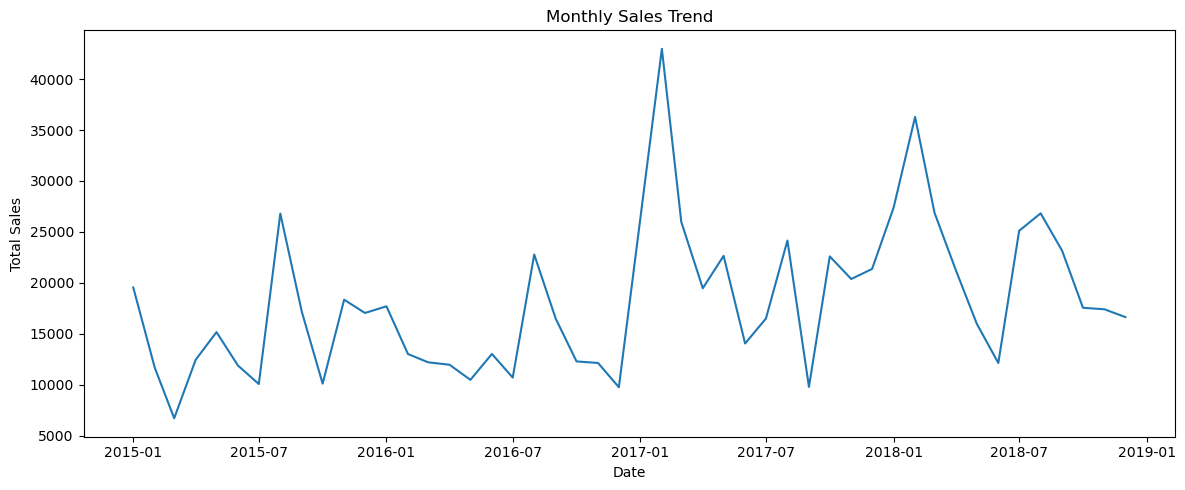

In [43]:
# Aggregate sales by month
monthly_sales = (
    df.groupby(["Order Year", "Order Month"])["Sales"]
      .sum()
      .reset_index()
)

# Create a proper datetime column for plotting
monthly_sales["Date"] = pd.to_datetime(
    monthly_sales["Order Year"].astype(int).astype(str) + "-" +
    monthly_sales["Order Month"].astype(int).astype(str) + "-01",
    errors="coerce"
)
#astype(int) removes .0,    -01 gives pandas a valid day,    errors="coerce" prevents crashes
## Converting year+month to datetime safely to avoid float parsing errors




# Plot
plt.figure(figsize=(12, 5))
plt.plot(monthly_sales["Date"], monthly_sales["Sales"])
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()


In [44]:
plt.savefig("../visuals/monthly_sales_trend.png", dpi=300, bbox_inches="tight")


<Figure size 640x480 with 0 Axes>

## Sales by Product Category

This analysis compares total sales across product categories.


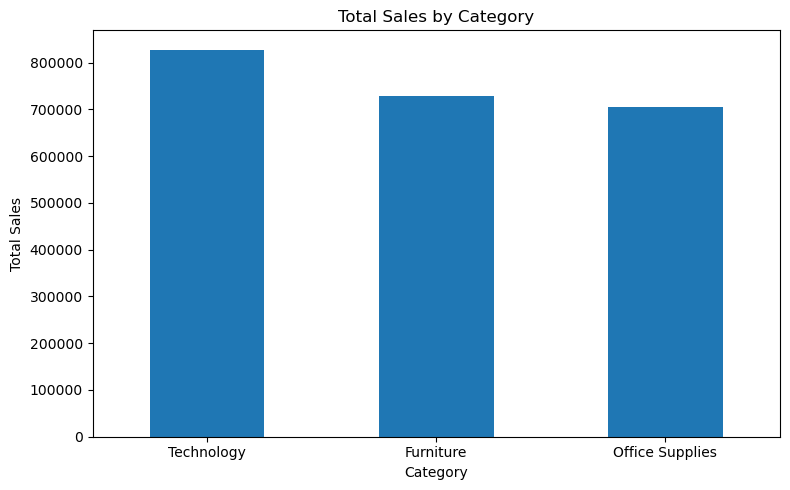

In [45]:
category_sales = (
    df.groupby("Category")["Sales"]
      .sum()
      .sort_values(ascending=False)
)

plt.figure(figsize=(8, 5))
category_sales.plot(kind="bar")
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [46]:
plt.savefig("../visuals/catogory_sales_trend.png", dpi=300, bbox_inches="tight")


<Figure size 640x480 with 0 Axes>

## Top 10 Products by Sales



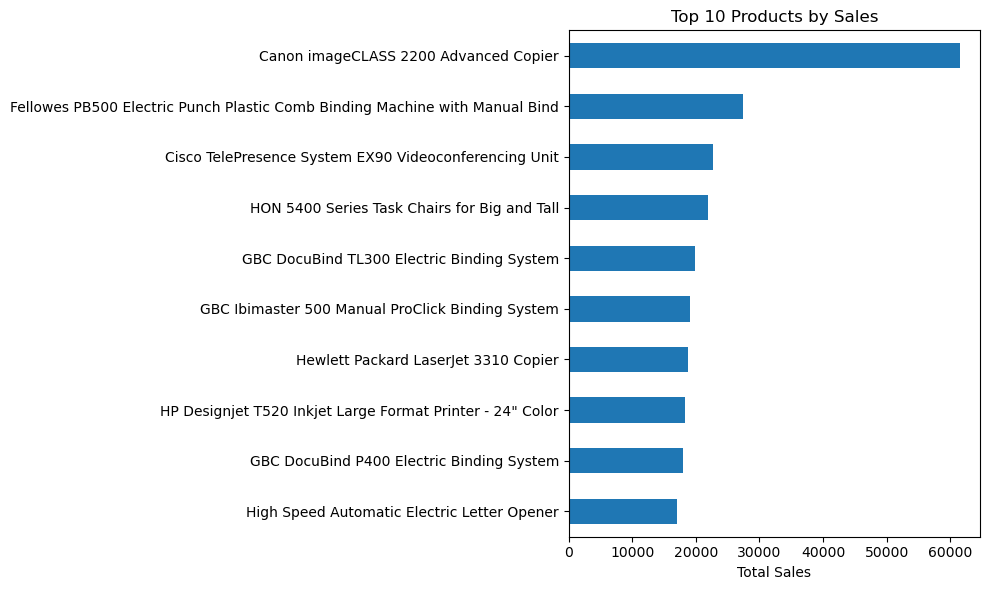

In [47]:
top_products = (
    df.groupby("Product Name")["Sales"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure(figsize=(10, 6))
top_products.plot(kind="barh")
plt.title("Top 10 Products by Sales")
plt.xlabel("Total Sales")
plt.ylabel("")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [48]:
plt.savefig("../visuals/top_ten_products_sales.png", dpi=300, bbox_inches="tight")


<Figure size 640x480 with 0 Axes>

### Key Observations

1. Monthly sales show noticeable fluctuations rather than a steady upward trend, indicating that overall business growth is inconsistent over time. Periodic peaks and dips suggest potential seasonality or timing-related effects in customer purchasing behavior.

2. The Technology category contributes the largest share of total sales, making it the primary revenue driver for the business.

3. A small number of products, particularly technology-related items such as printers and binding equipment, account for a disproportionately high share of total sales, indicating revenue concentration among top-performing products.
